---
# [ Project ] 구글 플레이 스토어 데이터를 활용한 데이터 분석

----
####  본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 분석의 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
1) 설치수와 평점 사이에 관계가 있는지를 알아봅니다. <br>
2) 1번의 결과를 유료앱과 무료앱으로 나누어서 분석해봅니다. <br>
3) Category별 점유율을 구하고, 설치수와 평점의 평균을 구해봅니다.

--- 
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 구글 플레이 스토어 데이터입니다.
   - https://www.kaggle.com/lava18/google-play-store-apps 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.
   
### ③ 필드 ###
- App, Category, Rating, Reviews  
- Size, Installs, Type, Price  
- Content Rating, Genres, Last Updated, Current Ver, Android Ver      


----

## 2. 데이터 읽기

### 해당 챕터의 목표
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.

제공되는 코드

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- read_csv, columns, shape

### [ Quiz 1] pandas의 함수를 사용하여 googleplaystore.csv을 읽어와 data라는 이름의 변수로 저장합니다.

In [2]:
# csv 파일 읽기/불러오기
data = pd.read_csv('./googleplaystore.csv')

### [Quiz 2]data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.

In [3]:
# data의 필드명
print("data의 필드명: ", data.columns)

# data의 필드개수
print("data의 필드개수: ", len(data.columns),"개")

# data의 데이터 수
print("data의 데이터 수: ", len(data),"개")

data의 필드명:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
data의 필드개수:  13 개
data의 데이터 수:  10841 개


In [4]:
# data 출력
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
# data 필드 속성과 개수 등 정보 보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다. 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- apply, lambda, replace
- 참고 링크 : https://datatofish.com/if-condition-in-pandas-dataframe/

### [Quiz 3] Installs 필드에 'Free'값으로 되어 있는 데이터를 필터(제거)합니다.

In [6]:
# Installs 필드에 'Free' 값으로 된 데이터 제거하기
data = data[data.Installs != 'Free']

In [7]:
# Installs 필드에 'Free' 값으로 된 데이터 제거된 결과 보기
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### [Quiz 4]  Quiz3의 결과를 사용 : Installs 필드의 데이터에서 +와 ,를 제거한 후 숫자 타입으로 치환합니다.
<br> (참고: 1.의 필터 이후(->Quiz3의 처리 이후)의 데이터는 '1,000,000+'와 같이 되어있습니다.)

In [8]:
# Installs 필드의 데이터에서 +와 ,를 제거
data['Installs'] = data['Installs'].apply(lambda number_type:number_type.replace(',','').replace('+',''))

# Installs 필드의 데이터를 숫자 타입으로 변경하기
data['Installs'] = data['Installs'].astype(int)

# Installs 필드 수정한 후 data 결과 보기
data

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
# Installs 필드의 데이터가 숫자 타입으로 변경되었는지 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


### [Quiz 5] Quiz4의 결과를 사용 : Size 필드에 'Varies with device'값으로 되어 있는 데이터를 필터(제거) 합니다.


In [10]:
# Size 필드에 'Varies with device' 값으로 된 데이터를 제거
data = data[data.Size != 'Varies with device']

# Size 필드에서 'Varies with device' 값으로 된 데이터가 정상적으로 제거되었는지 확인/출력
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


### [Quiz 6] Quiz5의 결과를 사용 : Reviews 데이터를 숫자 타입으로 치환합니다.

In [11]:
# Reviews 데이터를 숫자 타입으로 변경
data['Reviews'] = data['Reviews'].astype(int)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Reviews 데이터를 숫자로 변경된 결과보기
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   object 
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1000.2+ KB


---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Rating과 Installs를 각각 x축과 y축에 매핑하는 것으로 평점과 설치수 사이의 상관관계를 눈으로 확인합니다.
- 유료앱과 무료앱을 나누어 시각화 하는 것으로 유료앱과 무료앱이 가지는 차이를 눈으로 확인합니다.

제공되는 코드

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 원본 데이터의 손실을 방지하기 위해 복사본 만들기
visual_data = data.copy()

### _데이터 시각화 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, log10, scatter(또는 plot), groupby, subplots, get_group

### [Quiz 7]  Installs가 0 초과인  데이터만을 사용합니다. Rating, Intalls에서 값이 Nan인 데이터를 제거합니다.

In [14]:
# Installs 값이 0 초과한 데이터만 남겨두고 나머지 제거
visual_data = visual_data[visual_data['Installs']>0]

In [15]:
# Installs 값에서 0 초과한 데이터만 잘 남겨졌는지 확인/출력
visual_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [16]:
# 각 필드에 null의 개수 확인
visual_data.isnull().sum()

App                  0
Category             0
Rating            1402
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
# Rating, Installs 필드의 null 값 제거하기
visual_data = visual_data[pd.notnull(visual_data['Rating'])]
visual_data = visual_data[pd.notnull(visual_data['Installs'])]

In [18]:
# Rating, Installs 필드에서 null이 정상적으로 제거되었는지 개수 확인
visual_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

### [Quiz 8] X축이 Rating, Y축이 Installs인 점 그래프를 그려봅니다. <br>이 때 Installs의 값이 Rating에 비해 지나치게 크기 때문에 log10을 씌웁니다.

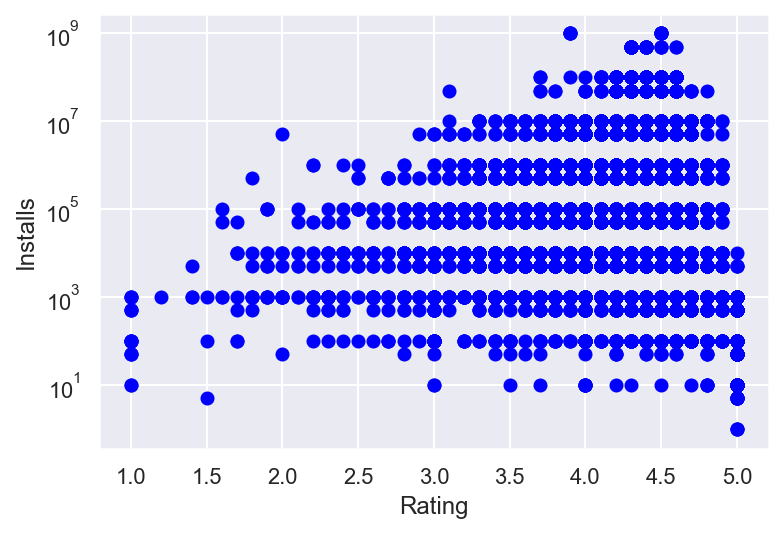

In [19]:
# X: Rating, Y: Installs, 색상은 파란색
plt.scatter(visual_data['Rating'], visual_data['Installs'], c='blue')

# X축 이름: Rating
plt.xlabel('Rating')

# Y축 이름: Installs
plt.ylabel('Installs')

# Y축의 값에 log 씌우기
plt.yscale('log')

# 그래프 출력
plt.show()

### [Quiz 9] X축이 Rating, Y축이 Reviews인 점 그래프를 그려봅니다. <br> 이 때, Reviews의 값에 log10을 씌우고, Type으로 GroupBy 하여 Type의 값이 'Free'인 경우는 'red', 'Paid'인 경우는 'green' 으로 표시합니다.

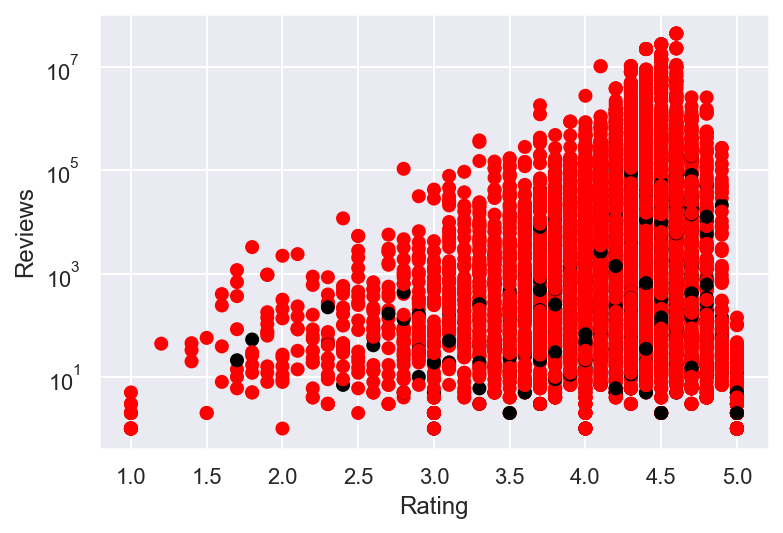

In [20]:
# 여러 개의 그래프를 한 번에 보여주기 위함
fig, ax = plt.subplots()
# 그리려는 여러 개의 그래프 색상을 지정
colors = {'Free':'red', 'Paid':'black'}

# X: Rating, Y: Reviews, 위에서 세팅한 색상으로 보여준다.
ax.scatter(visual_data['Rating'], visual_data['Reviews'], c=visual_data['Type'].map(colors))

# X축 이름: Rating
plt.xlabel('Rating')

# Y축 이름: Reviews
plt.ylabel('Reviews')

# Reviews 값에 log 씌우기
plt.yscale('log')

# 그래프 출력
plt.show()

---
## 5. 데이터 분석

### **해당 챕터의 목표**
- 시각화의 결과로 얻어진 insight를 기반으로 하여 데이터의 수치적인 부분의 토대를 마련합니다.
- 데이터의 평균, 중앙값, 최대값, 최소값 등 수치적인 데이터를 구해봅니다.

제공되는 코드

In [21]:
# 원본 데이터의 손실을 방지하기 위해 복사본 만들기
analysis_data = data.copy()

### _데이터 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, value_counts, pie, show, round, mean, groupby, get_group
- 모든 정답은 소수점 2자리까지 출력합니다. 단, 2번 문제의 경우 autopct='%1.2f%%' 파라미터 사용, 그 외는 round 함수 사용 

### [Quiz 10] Rating, Intalls가 Nan인 데이터는 제거합니다.

In [22]:
# 각 필드에 null의 개수 확인
analysis_data.isnull().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
# Rating, Installs에 null 값 제거하기
analysis_data = analysis_data[pd.notnull(analysis_data['Rating'])]
analysis_data = analysis_data[pd.notnull(analysis_data['Installs'])]

In [24]:
# Rating, Installs에 null 값이 정상적으로 제거되었는지 확인
analysis_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

### [Quiz 11] Category별 구글 플레이 스토어 점유율을 파이 그래프로 그려봅니다. 

In [25]:
# 각 Category 확인
analysis_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
# Category 별 점유율 확인
category_share = analysis_data['Category'].value_counts(normalize=True) * 100
category_share

FAMILY                 20.921206
GAME                   12.601889
TOOLS                   8.202872
MEDICAL                 4.192004
LIFESTYLE               3.622720
PERSONALIZATION         3.622720
FINANCE                 3.441584
SPORTS                  3.195756
BUSINESS                3.182818
PHOTOGRAPHY             3.053435
PRODUCTIVITY            3.040497
HEALTH_AND_FITNESS      2.885237
COMMUNICATION           2.729978
SHOPPING                2.315953
SOCIAL                  2.290076
DATING                  2.238323
NEWS_AND_MAGAZINES      2.186570
TRAVEL_AND_LOCAL        2.070126
BOOKS_AND_REFERENCE     1.863113
VIDEO_PLAYERS           1.500841
EDUCATION               1.423211
MAPS_AND_NAVIGATION     1.229137
ENTERTAINMENT           1.164446
FOOD_AND_DRINK          1.086816
AUTO_AND_VEHICLES       0.815112
LIBRARIES_AND_DEMO      0.802174
ART_AND_DESIGN          0.763359
HOUSE_AND_HOME          0.724544
WEATHER                 0.659853
COMICS                  0.633976
PARENTING 

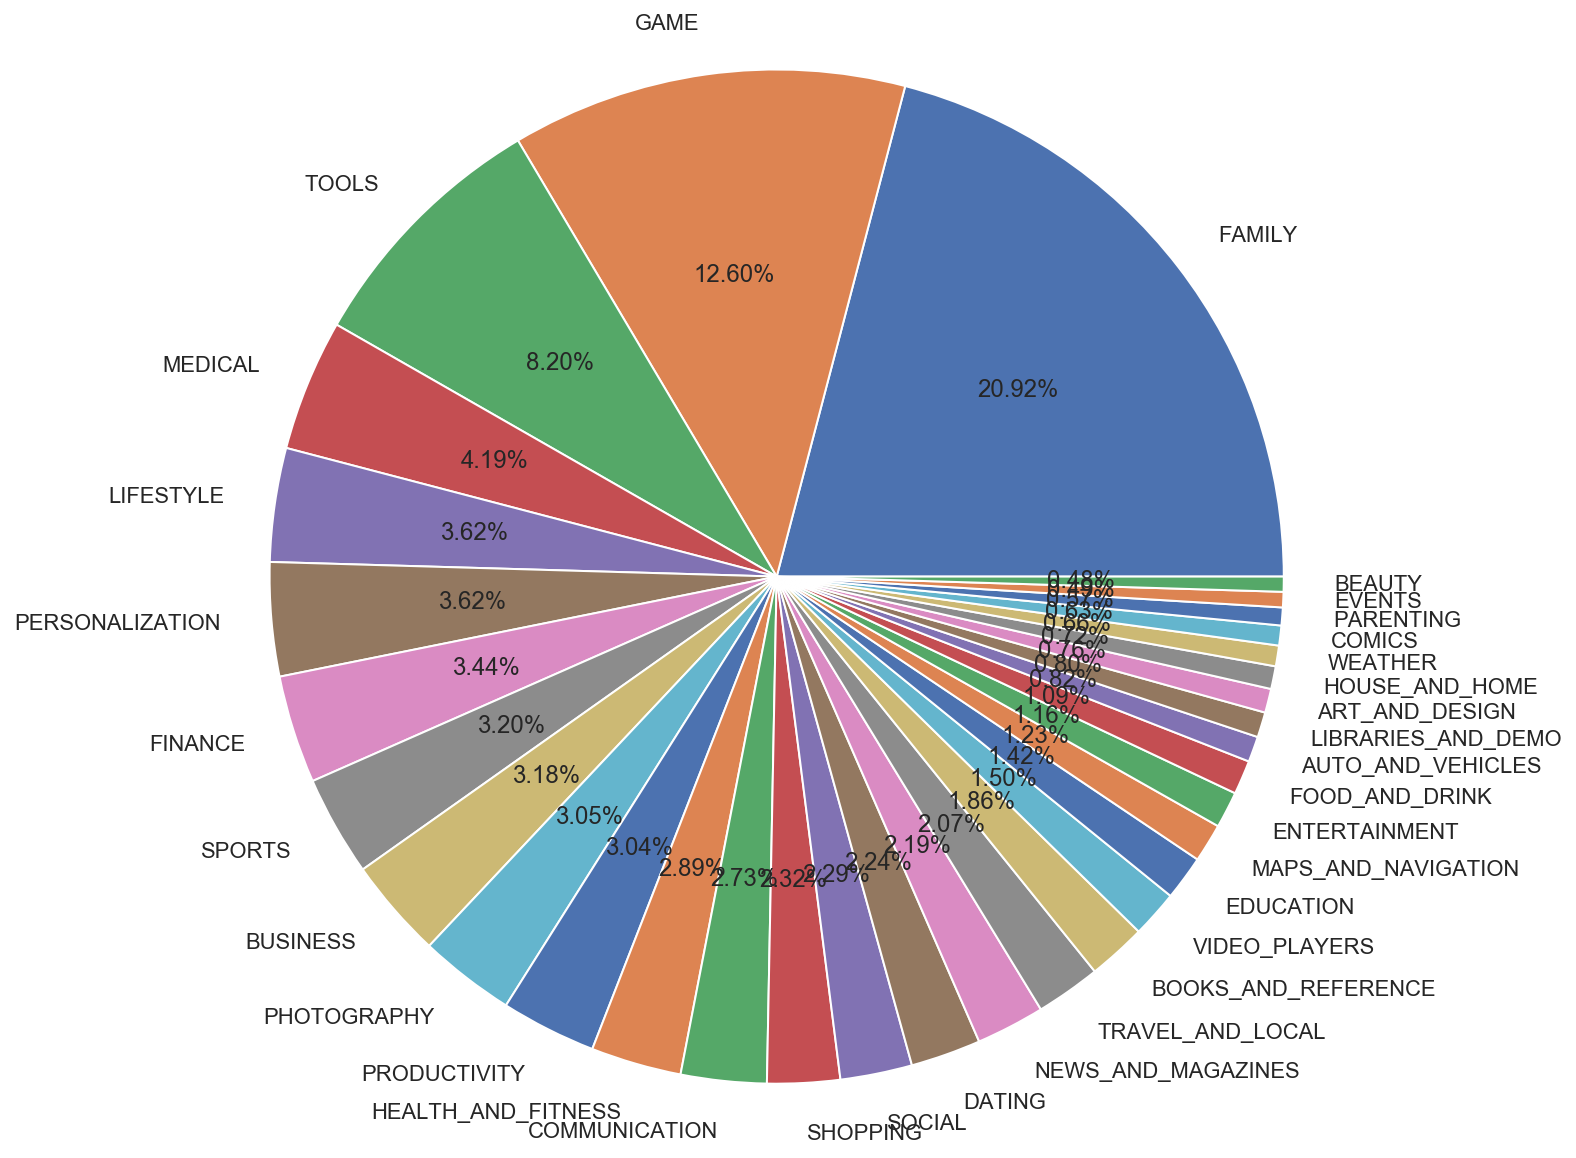

In [27]:
# 각 Category의 앱의 개수를 PIE 모양으로 그래프 그리기
# figsize: 그래프의 사이즈
ax = plt.subplots(figsize=(10, 10))

# 전체 대비 백분율로 표현(소수점 이하 2자리까지 표현)
category_share.plot.pie(autopct='%1.2f%%')
# 두 축을 동일하게 설정
plt.axis('equal')
# Y축의 제목이 그래프 항목의 라벨과 겹치므로 빈 칸으로 변경
plt.ylabel('')

# 그래프 출력
plt.show()

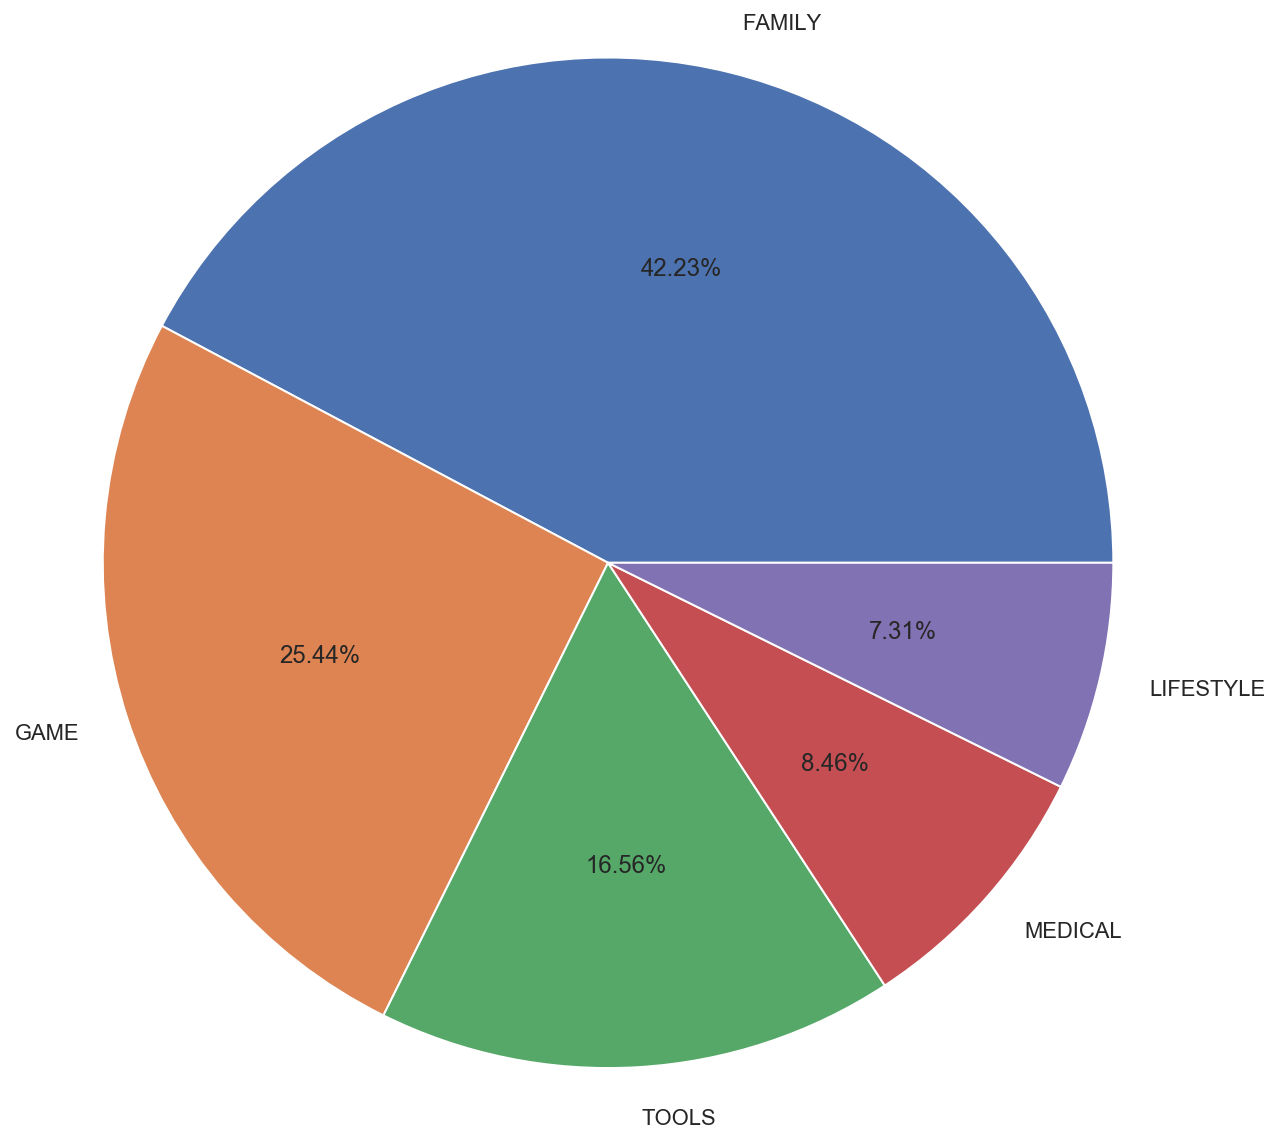

In [31]:
# 상위 5개의 Category 만 PIE 모양으로 그래프 그리기
ax = plt.subplots(figsize=(10, 10))

# 전체 대비 백분율로 표현(소수점 이하 2자리까지 표현
# 상위 5위까지만 표현
category_share[:5].plot.pie(autopct='%1.2f%%')
# 두 축을 동일하게 설정
plt.axis('equal')
# Y축의 제목이 그래프 항목의 라벨과 겹치므로 빈 칸으로 변경
plt.ylabel('')

# 그래프 출력
plt.show()

### [Quiz 12] 점유율 상위 5개의 카테고리를 구하고, 각각의 Rating 평균, Installs 평균을 구해봅니다.



In [29]:
# 각 Category의 개수를 DataFrame으로 만들기
category = pd.DataFrame(analysis_data['Category'].value_counts())

# 각 Category의 Rating 평균
category['Rating'] = analysis_data.groupby('Category')['Rating'].mean()

# 각 Category의 Installs 평균
category['Installs'] = analysis_data.groupby('Category')['Installs'].mean()

# 소수점 이하 2째자리까지만 표현
pd.options.display.float_format = '{:.2f}'.format

# DataFrame 상위 5개 출력하기 (head() = 5개)
# 정렬에 대한 옵션은 없었으므로, Category 기준 내림차순
category.head()

,Category,Rating,Installs
FAMILY,1617,4.19,4204349.77
GAME,974,4.27,30671922.71
TOOLS,634,4.01,5561598.58
MEDICAL,324,4.18,143497.15
LIFESTYLE,280,4.09,1563354.00


### [Quiz 13] 점유율 상위 5개의 카테고리중 Rating 평균이 가장 높은 Category를 구하고 해당 Category 데이터를 Type별로 GroupBy한 후 Rating, Installs 평균을 구해봅니다.

In [30]:
# 상위 5개 카테고리 추출
rank5 = category_share[:5].index.values
rank5_category = analysis_data[analysis_data['Category'].isin(rank5)]
rank5_category.head()

# 각 Category 별 Rating, Installs의 평균 구하기
round(rank5_category.groupby('Category')[['Rating','Installs']].mean(), 2)

# Rating 평균이 가장 높은 Category 구하기
rank1 = rank5_category.groupby('Category')['Rating'].mean().sort_values().index[-1]
print("Ranking 1:", rank1)

# 상위 1위 카테고리를 Type 별로 그룹핑 후 Rating, Installs 평균 구하기
rank1_category = analysis_data[analysis_data['Category'] == rank1]
round(rank1_category.groupby('Type')[['Rating', 'Installs']].mean(), 2)

Ranking 1: GAME


,Rating,Installs
Type,,
Free,4.26,33207512.19
Paid,4.37,278656.83
